### **1. Importe de librerias a usar**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

### **2. Deficion del modelo matemático para la celulosa e importe de datos obtenidos del laboratorio**

(los detalles de aplicacion de este modelo matematico se explican con mayor detalle en el apartado 7)

In [8]:
def linreg_cel(df,nomcel,valin):

  x = df['Retención de agua %']
  y = df['Contenido celulosa en mortero %Wt']
  sum_x = 0
  sum_y = 0
  sum_xy = 0
  sum_x2 = 0

  for i in range(len(x)):
    sum_x = sum_x + x[i]
    sum_y = sum_y + y[i]
    sum_xy = sum_xy + (x[i]*y[i])
    sum_x2 = sum_x2 + (x[i]**2)

  avg_x = sum_x / (len(x))
  avg_y = sum_y / (len(y))
  m_pend = ( sum_xy - ((sum_x*sum_y)/ len(x)) ) / ( sum_x2 - ((sum_x **2) / len(x)) )
  b_inte = avg_y - (m_pend*avg_x)

  resultado = (m_pend*valin)+b_inte
  return(print('la concentración de la celulosa "{}" debe de ser: {} % para obtener una retención de {}'.format(nomcel,round(resultado,3),valin)))

# --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- ---

def costo(df,nomcel,valin,precio_cel):

  x = df['Retención de agua %']
  y = df['Contenido celulosa en mortero %Wt']
  sum_x = 0
  sum_y = 0
  sum_xy = 0
  sum_x2 = 0

  for i in range(len(x)):
    sum_x = sum_x + x[i]
    sum_y = sum_y + y[i]
    sum_xy = sum_xy + (x[i]*y[i])
    sum_x2 = sum_x2 + (x[i]**2)

  avg_x = sum_x / (len(x))
  avg_y = sum_y / (len(y))
  m_pend = ( sum_xy - ((sum_x*sum_y)/ len(x)) ) / ( sum_x2 - ((sum_x **2) / len(x)) )
  b_inte = avg_y - (m_pend*avg_x)

  resultado = (m_pend*valin)+b_inte

  cel_uso = 25 * (resultado/100)
  precio_producc = cel_uso * precio_cel

  return(print('cantidad necesaria de celulosa de "{}" para producir 25kg de mortero es de {}kg, por un valor de costo de la celulosa de {}$'.format(nomcel,round(cel_uso,6),round(precio_producc,6))))

# --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- ---

ruta = 'Machine learning_Celulosa - año 2021.csv'
df_sample = pd.read_csv(ruta, encoding='utf-8')
df_sample = df_sample.drop(['Fecha de toma','Precio $/kg','Masa mortero kg','Densidad mezcla mortero kg/m³'], axis=1)

lista_columnas = ['Contenido grupo metoxil %Wt','Contenido grupo hidroxipropil %Wt','Contenido humedad %Wt',
                  'Contenido de cenizas %Wt','pH al 1% a 25°C','Tamaño de partícula mm','Contenido celulosa en mortero %Wt','Retención de agua %']

for i in lista_columnas:
  df_sample[i] = df_sample[i].str.replace(',', '.').astype(float)
  
display(df_sample.describe())
print('\n***********************************************************************************************************************\n')
df_sample.info()

,Contenido grupo metoxil %Wt,Contenido grupo hidroxipropil %Wt,Contenido humedad %Wt,Contenido de cenizas %Wt,pH al 1% a 25°C,Viscosidad mpa.s,Tamaño de partícula mm,Contenido celulosa en mortero %Wt,Temperatura ambiente °C,Humedad relativa %,Retención de agua %
count,25.000000,25.000000,30.000000,20.000000,40.000000,40.000000,40.000000,45.000000,45.000000,45.000000,45.000000
mean,21.260000,10.000000,4.716667,3.032500,7.300000,68388.375000,0.181125,0.090000,33.622222,31.111111,86.462044
std,1.579293,1.103026,0.170361,0.927741,0.372104,37763.026226,0.003804,0.028604,1.248433,4.452896,8.133859
min,19.900000,7.900000,4.500000,1.900000,6.700000,4907.000000,0.177000,0.050000,31.000000,24.000000,68.542000
25%,20.200000,10.200000,4.500000,2.650000,7.125000,61375.000000,0.180000,0.070000,33.000000,28.000000,82.031000
50%,20.400000,10.300000,4.750000,2.900000,7.250000,64950.000000,0.181000,0.090000,34.000000,30.000000,87.671000
75%,21.700000,10.700000,4.900000,3.282500,7.575000,69125.000000,0.181000,0.110000,35.000000,34.000000,92.234000
max,24.100000,10.900000,4.900000,4.430000,7.800000,151700.000000,0.190000,0.130000,35.000000,40.000000,100.406000



***********************************************************************************************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Nombre celulosa                    45 non-null     object 
 1   # de lote/referencia               45 non-null     object 
 2   Contenido grupo metoxil %Wt        25 non-null     float64
 3   Contenido grupo hidroxipropil %Wt  25 non-null     float64
 4   Contenido humedad %Wt              30 non-null     float64
 5   Contenido de cenizas %Wt           20 non-null     float64
 6   pH al 1% a 25°C                    40 non-null     float64
 7   Viscosidad mpa.s                   40 non-null     float64
 8   Tamaño de partícula mm             40 non-null     float64
 9   Contenido celulosa en mortero %Wt  45 non-null     float64
 10  Te

### **3. Organización de los datos para realizar gráfica:**

In [9]:
df_grafica = df_sample[['Nombre celulosa','# de lote/referencia','Contenido celulosa en mortero %Wt','Retención de agua %']]

df_omy = df_grafica[df_grafica['Nombre celulosa']=='Omya – wekcelo mp 150hmr']
df_and = df_grafica[df_grafica['Nombre celulosa']=='Anders – mizuda mh-k150lx'].reset_index()
df_con = df_grafica[df_grafica['Nombre celulosa']=='Conquimica – celocell pm150h'].reset_index()
df_imp = df_grafica[df_grafica['Nombre celulosa']=='Importiles'].reset_index()
df_con_h = df_grafica[df_grafica['Nombre celulosa']=='Conquimica – celocell 150h'].reset_index()

### **4. Visualización de dispersión de los datos:**

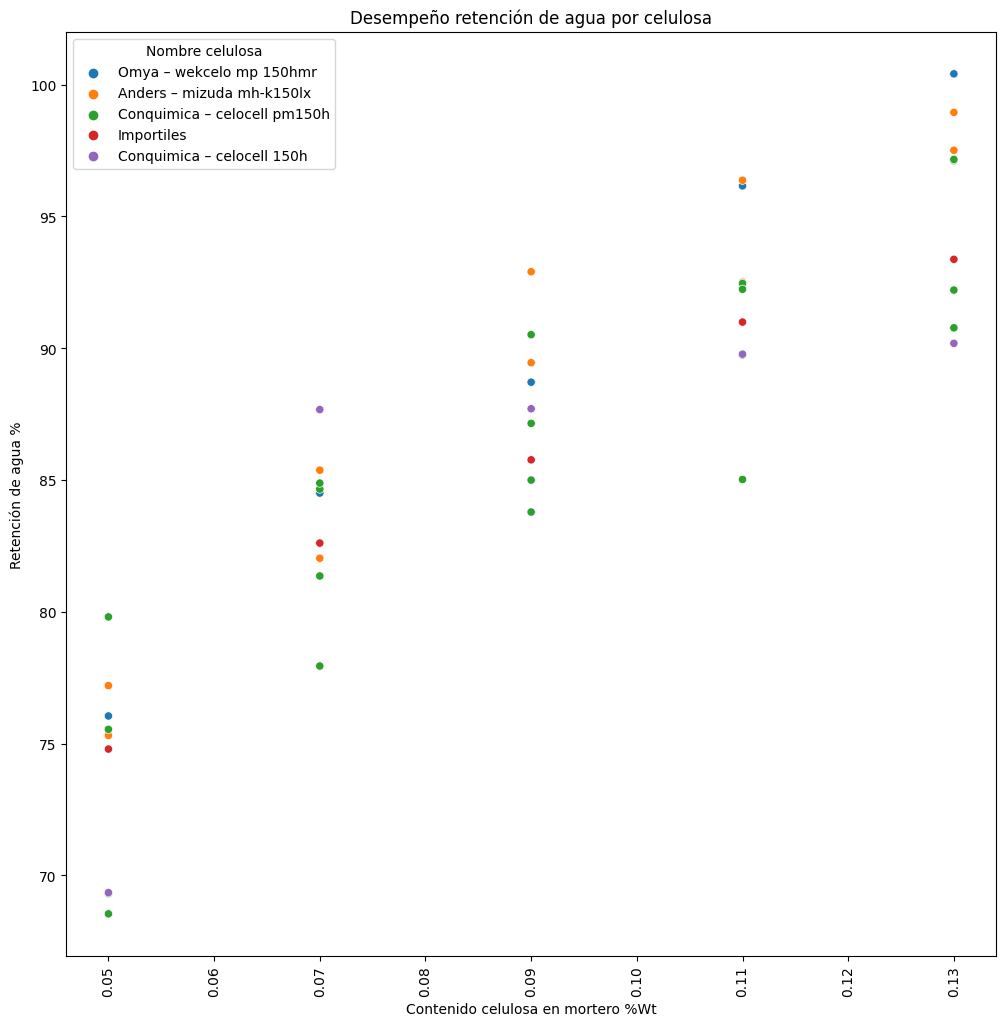

In [10]:
fig, ax = plt.subplots(figsize=(12,12))

g = sns.scatterplot(x='Contenido celulosa en mortero %Wt', y='Retención de agua %', data=df_grafica,hue='Nombre celulosa') 
ax.grid(False)
plt.xticks(rotation=90)
#plt.legend([],[], frameon=False)
plt.title("Desempeño retención de agua por celulosa")

plt.show()

### **5. Aproximación lineal sobre los datos por cada celulosa:**
(individual, y agrupadas)

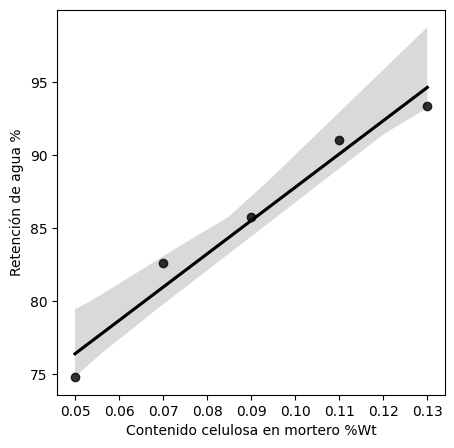

In [11]:
fig, ax = plt.subplots(figsize=(5,5))
sns.regplot(x="Contenido celulosa en mortero %Wt", y="Retención de agua %", data=df_imp, color="black");
ax.grid(False)

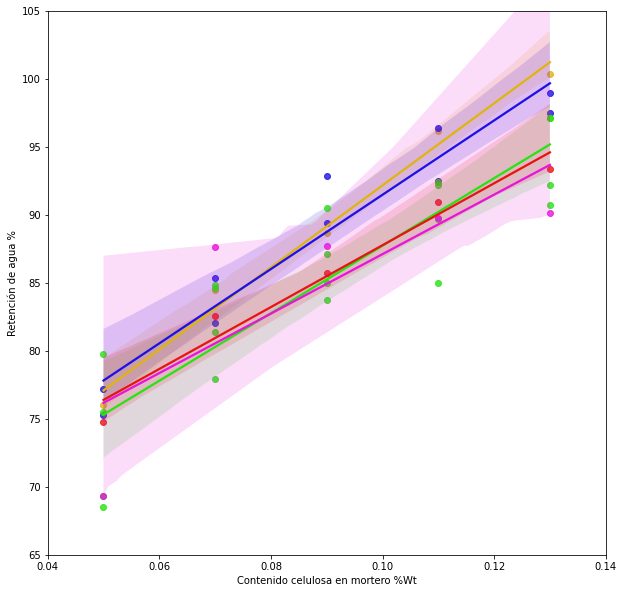

In [7]:
fig2, ax2 = plt.subplots(figsize=(10,10))

sns.regplot(x="Contenido celulosa en mortero %Wt", y="Retención de agua %", data=df_omy, color="#DEB510",ax=ax2).set(xlim=(0.04,0.14),ylim=(65,105)) # Amarillo omia
sns.regplot(x="Contenido celulosa en mortero %Wt", y="Retención de agua %", data=df_and, color="#1E11E3",ax=ax2) # Azul anders
sns.regplot(x="Contenido celulosa en mortero %Wt", y="Retención de agua %", data=df_con, color="#27E311",ax=ax2) # Verde conquimica
sns.regplot(x="Contenido celulosa en mortero %Wt", y="Retención de agua %", data=df_imp, color="#E81414",ax=ax2) # Rojo importiles
sns.regplot(x="Contenido celulosa en mortero %Wt", y="Retención de agua %", data=df_con_h, color="#E814DB",ax=ax2) # Rojo importiles

ax2.grid(False)

### **6. Sensibilidad y correlación entre variables:**

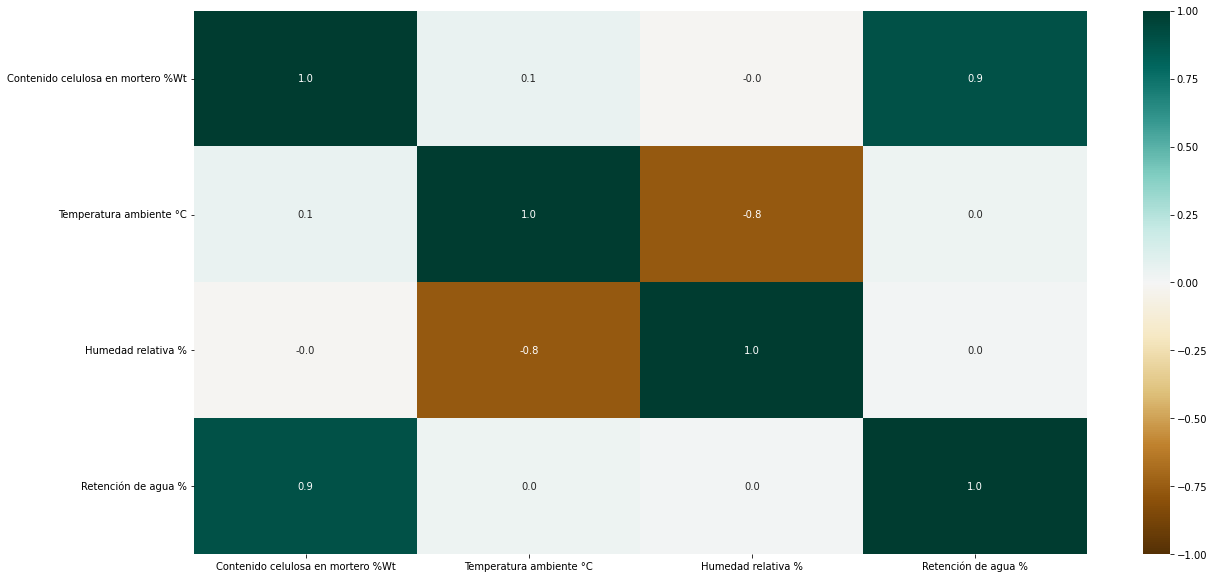

In [8]:
fig, ax = plt.subplots(figsize=(20,10))
#df_ML_sin = df_ML.drop('Contenido celulosa en mortero %Wt', axis=1)
df_luc = df_sample[['Contenido celulosa en mortero %Wt','Temperatura ambiente °C','Humedad relativa %','Retención de agua %']]
sns.heatmap(data = df_luc.corr(), vmin=-1, vmax=1, cmap="BrBG", annot=True, fmt='.1f')

In [9]:
#g = sns.PairGrid(df_luc)
#g2 = g.map_diag(plt.hist)
#g3 = g2.map_offdiag(plt.scatter)
#plt.show()

### **7. Ajuste matemático para estimar concentración de celulosa para una determinada retención de agua, por celulosa:**
(se ajusta para cada celulosa por individual, y solo se toma en cuenta las variables retencion de agua vs concentracion de celulosa en mortero)

In [10]:
retencion_deseada = 93.753
linreg_cel(df_omy,'Omya',retencion_deseada)
linreg_cel(df_and,'Anders',retencion_deseada)
linreg_cel(df_con,'Conquimica',retencion_deseada)
linreg_cel(df_imp,'Importiles',retencion_deseada)
print('\n***********************************************************************************************************\n')
linreg_cel(df_sample,'todas juntas', retencion_deseada)

la concentración de la celulosa "Omya" debe de ser: 0.105 % para obtener una retención de 93.753
la concentración de la celulosa "Anders" debe de ser: 0.107 % para obtener una retención de 93.753
la concentración de la celulosa "Conquimica" debe de ser: 0.117 % para obtener una retención de 93.753
la concentración de la celulosa "Importiles" debe de ser: 0.125 % para obtener una retención de 93.753

***********************************************************************************************************

la concentración de la celulosa "todas juntas" debe de ser: 0.113 % para obtener una retención de 93.753


### **7.1. Precios de costo por celulosa**



In [11]:
costo(df_omy,'Omya',retencion_deseada,15959)
costo(df_and,'Anders',retencion_deseada,16603.6)
costo(df_con,'Conquimica',retencion_deseada,16120)
costo(df_imp,'Importiles',retencion_deseada,15882)

cantidad necesaria de celulosa de "Omya" para producir 25kg de mortero es de 0.026251kg, por un valor de costo de la celulosa de 418.937605$
cantidad necesaria de celulosa de "Anders" para producir 25kg de mortero es de 0.02676kg, por un valor de costo de la celulosa de 444.30761$
cantidad necesaria de celulosa de "Conquimica" para producir 25kg de mortero es de 0.029295kg, por un valor de costo de la celulosa de 472.22922$
cantidad necesaria de celulosa de "Importiles" para producir 25kg de mortero es de 0.031229kg, por un valor de costo de la celulosa de 495.973954$


### **8. Modelo de machine learning**:
(aquí se tienen en cuenta todas las variables de entrada)

In [12]:
cel = ['Conquimica – celocell pm150h','Omya – wekcelo mp 150hmr']
df_ML = df_sample[df_sample['Nombre celulosa'].isin(cel)]
df_ML = df_ML.drop('Contenido de cenizas %Wt', axis=1)
display(df_ML.describe())
print('\n***********************************************************************************************************************\n')
df_ML.info()

,Contenido grupo metoxil %Wt,Contenido grupo hidroxipropil %Wt,Contenido humedad %Wt,pH al 1% a 25°C,Viscosidad mpa.s,Tamaño de partícula mm,Contenido celulosa en mortero %Wt,Temperatura ambiente °C,Humedad relativa %,Retención de agua %
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000
mean,21.260000,10.000000,4.680000,7.180000,83800.000000,0.182800,0.090000,33.560000,30.96000,86.040240
std,1.579293,1.103026,0.163299,0.269258,34801.580424,0.003674,0.028868,1.386843,4.60507,8.347484
min,19.900000,7.900000,4.500000,6.700000,60700.000000,0.181000,0.050000,31.000000,24.00000,68.542000
25%,20.200000,10.200000,4.500000,7.200000,68300.000000,0.181000,0.070000,32.000000,27.00000,81.359000
50%,20.400000,10.300000,4.700000,7.200000,69100.000000,0.181000,0.090000,34.000000,30.00000,85.020000
75%,21.700000,10.700000,4.800000,7.300000,69200.000000,0.181000,0.110000,35.000000,33.00000,92.205000
max,24.100000,10.900000,4.900000,7.500000,151700.000000,0.190000,0.130000,35.000000,40.00000,100.406000



***********************************************************************************************************************

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 39
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Nombre celulosa                    25 non-null     object 
 1   # de lote/referencia               25 non-null     object 
 2   Contenido grupo metoxil %Wt        25 non-null     float64
 3   Contenido grupo hidroxipropil %Wt  25 non-null     float64
 4   Contenido humedad %Wt              25 non-null     float64
 5   pH al 1% a 25°C                    25 non-null     float64
 6   Viscosidad mpa.s                   25 non-null     float64
 7   Tamaño de partícula mm             25 non-null     float64
 8   Contenido celulosa en mortero %Wt  25 non-null     float64
 9   Temperatura ambiente °C            25 non-null     int64  
 10  Hu

In [13]:
X = df_ML.drop(['Nombre celulosa','# de lote/referencia','Contenido celulosa en mortero %Wt'], axis=1)
y = df_ML['Contenido celulosa en mortero %Wt']

X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size = 2, random_state=4)
#display(X_tr)

In [14]:
model_pipeline = Pipeline([
                  ('Scale', StandardScaler()),
                  ('pca', PCA()),
                  ('MODEL', ElasticNet(random_state = 7))
                ])

param_grid = {
              'MODEL__alpha': [0.027,0.028,0.029],
              'MODEL__l1_ratio': [0.081,0.082,0.083],
              }

grid_search = GridSearchCV(estimator=model_pipeline, param_grid=param_grid, scoring='r2', cv=3, refit=True, return_train_score=True)
grid_search.fit(X_tr, y_tr) 

print("Complete details of the model:  ",grid_search.best_estimator_)
print("Best scorer:                    ",grid_search.best_score_)
print("Best Hyperparameters choosen:   ",grid_search.best_params_)
print("Best Index:                     ",grid_search.best_index_)
print("Scorer:                         ",grid_search.scorer_)
print("number of splits:               ",grid_search.n_splits_)
print("refit_time:                     ",grid_search.refit_time_)


bestmodel = grid_search.best_estimator_ # BM: best model
y_pred = bestmodel.predict(X_ts)

print('\n********************************************************************************************************************\n')

print('el porcentaje de acierto de este modelo es de: {} %'.format(100*round(r2_score(y_ts,y_pred),5)))

Complete details of the model:   Pipeline(steps=[('Scale', StandardScaler()), ('pca', PCA()),
                ('MODEL',
                 ElasticNet(alpha=0.027, l1_ratio=0.081, random_state=7))])
Best scorer:                     0.5970992557327651
Best Hyperparameters choosen:    {'MODEL__alpha': 0.027, 'MODEL__l1_ratio': 0.081}
Best Index:                      0
Scorer:                          make_scorer(r2_score)
number of splits:                3
refit_time:                      0.003986358642578125

********************************************************************************************************************

el porcentaje de acierto de este modelo es de: -95.883 %


In [15]:
c_metoxil = 23.52
c_hidroxipopil = 8.1
c_humedad = 4.7
pH_1  = 6.7
viscosidad = 60700
tam_particula = 0.182
T_amb = 31.1
humedad_rel = 40.6
reten_agua = 92


eval = [c_metoxil,c_hidroxipopil,c_humedad,pH_1,viscosidad,tam_particula,T_amb,humedad_rel,reten_agua]
eval = np.array(eval)
resultado = bestmodel.predict(eval.reshape(1,-1))
print('el valor de % CONTENIDO PORCENTUAL DE LA CELULOSA para la nueva muestra es de: .......  {} %'.format(resultado))

el valor de % CONTENIDO PORCENTUAL DE LA CELULOSA para la nueva muestra es de: .......  [0.09862187] %


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
